<a href="https://colab.research.google.com/github/minhvvan/CNN_MNIST/blob/main/cnn_on_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [ ]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_train = train["label"]

In [ ]:
X_train = train.drop(labels = ["label"],axis = 1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [ ]:
X_train = X_train.astype('float32') / 255
test = test.astype('float32') / 255

In [ ]:
X_train = X_train.values.reshape(42000,28,28,1)
test = test.values.reshape(28000,28,28,1)

In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)
print(Y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


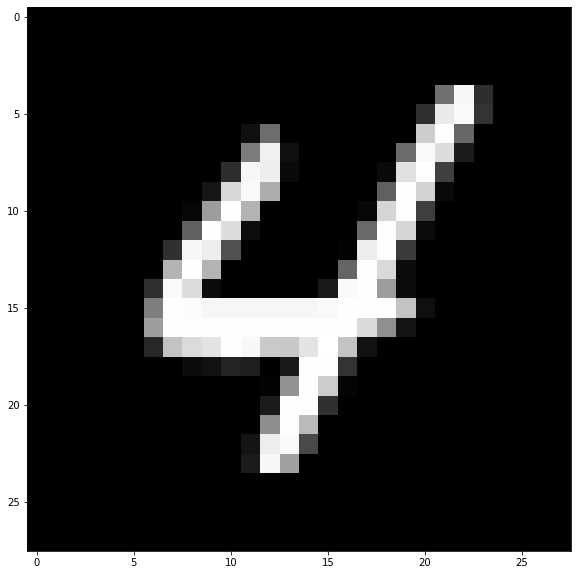

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
x = test[42]
x = x.reshape(28,28)
plt.imshow(x , cmap='gray')

In [ ]:
print(Y_train.shape)
print(Y_train[1])

(42000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras import layers,models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(layers.Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(128,kernel_size = (3,3),activation = 'relu'))
model.add(layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same'))


model.add(layers.Flatten())

model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         1

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=20,batch_size = 65)

Epoch 1/20
647/647 [==============================] - 5s 8ms/step - loss: 0.2041 - accuracy: 0.9359
Epoch 2/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0476 - accuracy: 0.9863
Epoch 3/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0316 - accuracy: 0.9905
Epoch 4/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0265 - accuracy: 0.9930
Epoch 5/20
647/647 [==============================] - 6s 9ms/step - loss: 0.0231 - accuracy: 0.9937
Epoch 6/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0203 - accuracy: 0.9947
Epoch 7/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0192 - accuracy: 0.9948
Epoch 8/20
647/647 [==============================] - 6s 9ms/step - loss: 0.0160 - accuracy: 0.9960
Epoch 9/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0155 - accuracy: 0.9962
Epoch 10/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0157 - accuracy: 0.9967

In [ ]:
results = model.predict(test)

In [ ]:
results = np.argmax(results,axis = 1)

In [ ]:

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("MNIST.csv",index=False)